<a href="https://colab.research.google.com/github/DmitryPavlyuk/ai-aviation-engineering/blob/main/03.VisualInspection/3.3.CrackClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3. Crack Classification

Module: Artificial Intelligence for Aviation Engineering

Instructor: prof. Dmitry Pavlyuk

In [1]:
!git clone https://github.com/paritoshg/Deep-Learning-Structural-Crack-Detection-And-Classification.git
!ls Deep-Learning-Structural-Crack-Detection-And-Classification/Data


Cloning into 'Deep-Learning-Structural-Crack-Detection-And-Classification'...
remote: Enumerating objects: 2711, done.
remote: Total 2711 (delta 0), reused 0 (delta 0), pack-reused 2711 (from 1)
Receiving objects: 100% (2711/2711), 485.86 MiB | 27.00 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (2618/2618), done.
Test  Train  Validation


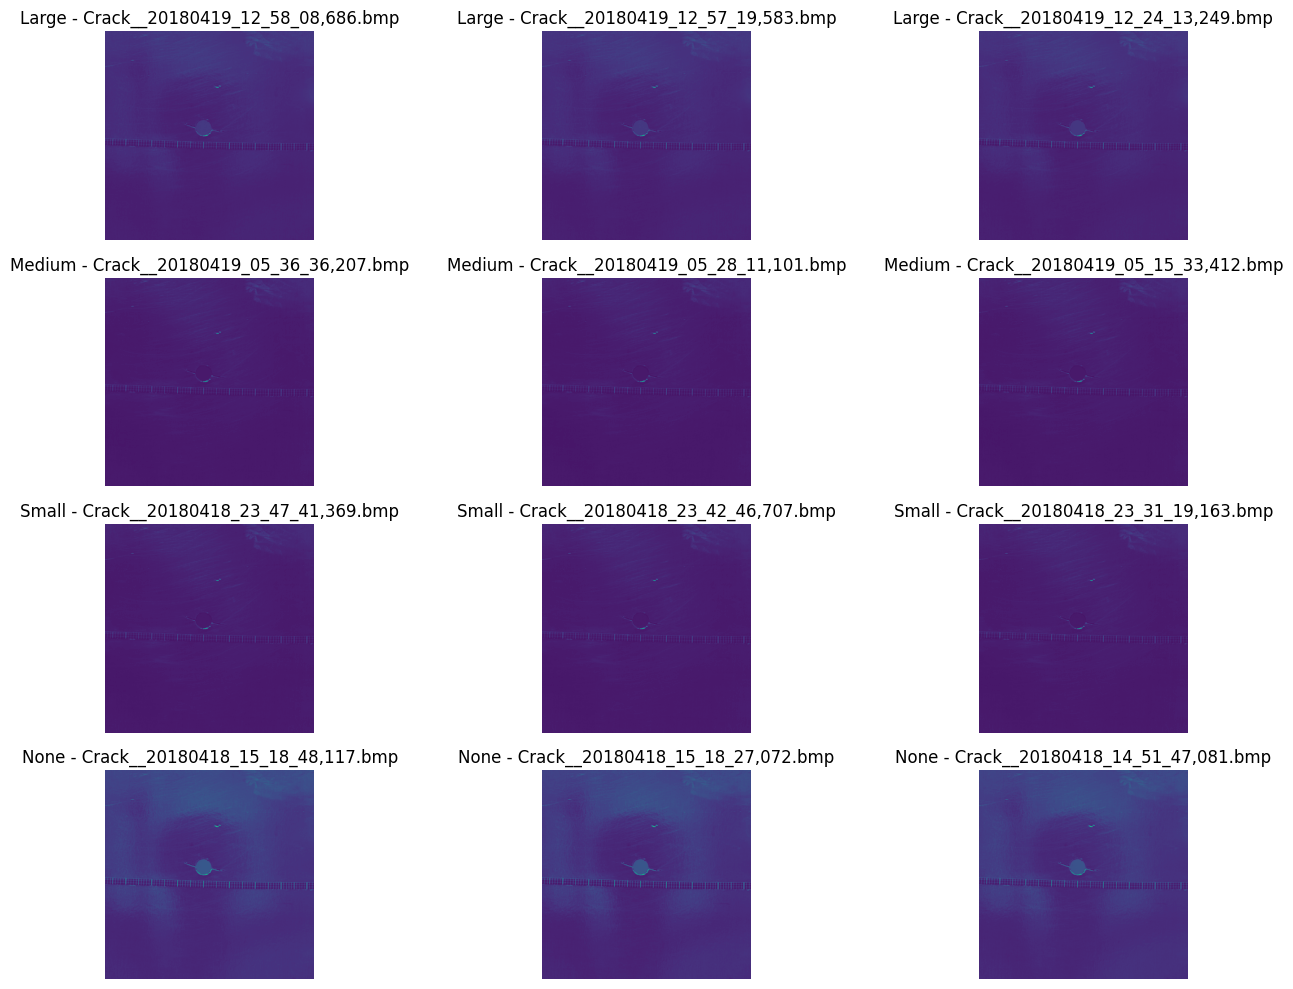

In [6]:
# prompt: present 10 random pictures from Train -from Large, Medium, Small and None

import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Assuming the images are in the 'Data' directory within the cloned repository
data_dir = "Deep-Learning-Structural-Crack-Detection-And-Classification/Data"
train_dir = os.path.join(data_dir, "Train")

categories = ["Large", "Medium", "Small", "None"]
num_images_per_category = 3
fig = plt.figure(figsize=(15, 10))

for i, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    if os.path.exists(category_path) and os.path.isdir(category_path):
        image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

        if image_files:
          num_images = min(num_images_per_category,len(image_files))
          for j in range(num_images):
            random_image_index = random.randint(0,len(image_files)-1)
            image_file = image_files[random_image_index]
            image_path = os.path.join(category_path, image_file)
            try:
                img = Image.open(image_path)
                ax = fig.add_subplot(len(categories), num_images_per_category, i * num_images_per_category + j + 1)
                ax.imshow(img)
                ax.set_title(f"{category} - {image_file}")
                ax.axis('off')

            except Exception as e:
              print(f"Error loading image {image_path}: {e}")


    else:
        print(f"Warning: Directory {category_path} not found.")

plt.tight_layout()
plt.show()

In [8]:
!pip install keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
from datetime import datetime
from numpy.random import seed

img_width, img_height = 100, 100

train_data_dir = os.path.join(data_dir, "Train")
validation_data_dir = os.path.join(data_dir, "Validation")

nb_train_samples = 1600
nb_validation_samples = 800

epochs = 20
batch_size = 128

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

history = model.fit(
          # shuffle = True,
          train_generator,
          steps_per_epoch = nb_train_samples // batch_size,
          epochs = epochs,
          validation_data = validation_generator,
          validation_steps = nb_validation_samples // batch_size)


model.summary()

Found 1600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/20
 2/12 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.2402 - loss: 1.5742  

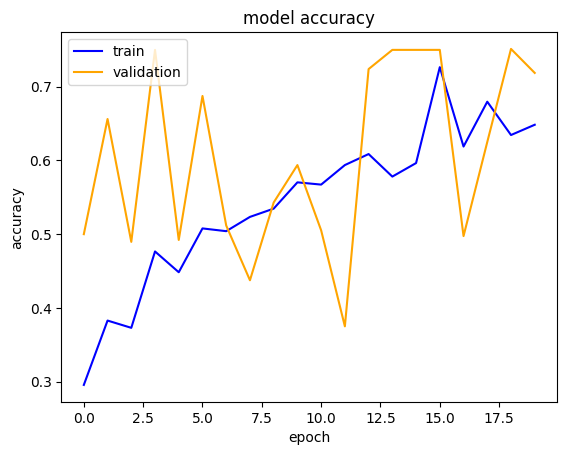

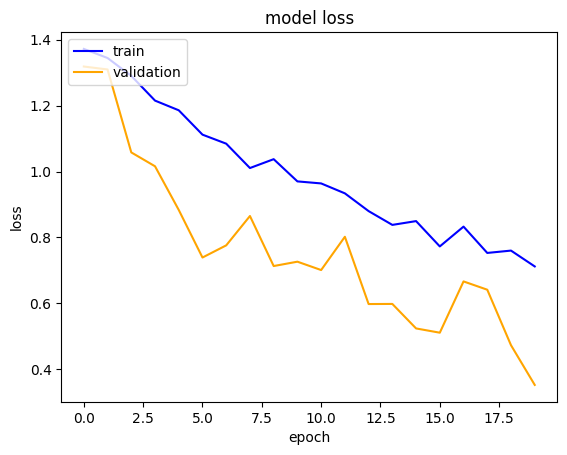

In [17]:
plt.plot(history.history['accuracy'], color="blue")
plt.plot(history.history['val_accuracy'], color="orange")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'], color="blue")
plt.plot(history.history['val_loss'], color="orange")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Thank you